# Pandas I

<a id="section_toc"></a> 
## Tabla de Contenidos

[Intro](#section_intro)

[Constructor](#section_constructor)

$\hspace{.5cm}$[1. Desde una instancia de `Series`](#section_constructor_from_series)

$\hspace{.5cm}$[2. Desde una lista de `dicts`](#section_constructor_from_dicts)

$\hspace{.5cm}$[2. Desde un array `Numpy` de dos dimensiones](#section_constructor_from_2darray)

[Selección de datos en `DataFrame`](#section_selection)

$\hspace{.5cm}$[1. Primeros n elementos, últimos n elementos](#section_selection_head_tail)

$\hspace{.5cm}$[2. Muestra aleatoria de n elementos](#section_selection_sample)

$\hspace{.5cm}$[3. Columnas](#section_selection_col)

$\hspace{.5cm}$[4. Indexación](#section_selection_index)

[Moficación de valores](#section_modify)

---


## DataFrame

<a id="section_intro"></a> 
###  Intro
[volver a TOC](#section_toc)

#### Documentación 
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

Representa una estructura de datos **tabular** que contiene una colección de columnas, cada una de las cuales tiene un tipo de datos determinado (number, string, boolean, etc.).

Podemos pensar un objeto `DataFrame` como un diccionario de `Series` "alineadas" (que comparten el mismo índice).

Una instancia de DataFrame tiene **índices de columnas y de filas**.  

![Image](img/dataframe.jpg)


### `DataFrame` como un diccionario de `Series` "alineadas"

Un `DataFrame` es un tipo de datos análogo a `Series` en dos dimensiones. 

Como ejemplo, generemos un DataFrame con datos de área y población para distintos estados combinando dos series.

1) Generemos un objeto `Series` con el área de algunos estados a partir de un diccionario:

In [20]:
import pandas as pd
import numpy as np

In [21]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}



area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

2) Generemos un objeto `Series` con la población de algunos estados a partir de listas:

In [22]:
states_list = ['Illinois','Texas','New York', 'Florida', 'California']
states_pop = [12882135, 26448193, 19651127, 19552860, 38332521]



population = pd.Series(states_pop, index= states_list)
population

Illinois      12882135
Texas         26448193
New York      19651127
Florida       19552860
California    38332521
dtype: int64

### DataFrame como un diccionario especializado



Generamos un objeto `DataFrame` a partir de los dos objetos `Series` generados en los puntos anteriores:

In [24]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Florida,19552860,170312
Illinois,12882135,149995
New York,19651127,141297
Texas,26448193,695662


Al igual que Series, un DataFrame posee un atributo index:

In [5]:
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

Además, tiene un atributo columns, que es un objeto de tipo Index conteniendo las etiquetas de columnas:

In [6]:
states.columns

Index(['population', 'area'], dtype='object')

Pueden observar que tanto los nombres de filas como los nombres de columnas son objetos del tipo `Index`.


De forma similar, podemos pensar auna instancia de `DataFrame` como un diccionario: 
    
* Un diccionario mapea una key con un valor
* Un `DataFrame` mapea un nombre de columna con una `Series` de datos.
    
Por ejemplo, pedir el atributo `area` del `DataFrame` `states` devuelve una instancia de `Series`. 


In [33]:
type(states)

pandas.core.frame.DataFrame

In [31]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [8]:
states.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>
      <label>¿Qué diferencia hay entre == y is ?</label></div>
</div>


elementwise

<a id="section_constructor"></a> 
## Constructor

#### Documentación
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


<a id="section_constructor_from_series"></a> 
### Desde una instancia de `Series`:
[volver a TOC](#section_toc)

In [37]:
population

Illinois      12882135
Texas         26448193
New York      19651127
Florida       19552860
California    38332521
dtype: int64

In [38]:
pd.DataFrame(population)

,0
Illinois,12882135
Texas,26448193
New York,19651127
Florida,19552860
California,38332521


In [39]:
population.name

In [36]:
population.name='pop'

In [37]:
population.name

'pop'

In [39]:
pd.DataFrame(population)

,pop
Illinois,12882135
Texas,26448193
New York,19651127
Florida,19552860
California,38332521


<a id="section_constructor_from_dicts"></a> 
### Desde una lista de `dicts`
[volver a TOC](#section_toc)

In [55]:
dict_0 = {'a': 0, 'b': 0}

dict_1 = {'a': 1, 'b': 2}

dict_2 = {'a': 2, 'b': 4}

data = [dict_0, dict_1, dict_2]

pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Otra forma de construir lo mismo, usando listas por comprensión:

In [56]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]

print(data)

pd.DataFrame(data)

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]


,a,b
0,0,0
1,1,2
2,2,4


Incluso si alguna key no tiene un valor asociado en el diccionario, Pandas completa con NaN el valor:

In [57]:
pd.DataFrame([ {'a': 1, 'b': 2} ,   {'b': 3, 'c': 4}]  )

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


<a id="section_constructor_from_2darray"></a> 
### Desde un array `Numpy` de dos dimensiones:
[volver a TOC](#section_toc)


In [59]:
pd.DataFrame(array_2d)



,0,1
0,0.685939,0.431851
1,0.714825,0.396139
2,0.060758,0.322124


In [42]:
array_2d = np.random.rand(3, 2)
# veamos qué hay en la variable array_2d:
print(array_2d)


[[0.10573435 0.30352429]
 [0.20548276 0.30369767]
 [0.26485417 0.38512341]]


In [43]:

columns_names = ['foo', 'bar']
rows_names = ['a', 'b', 'c']

pd.DataFrame(array_2d, columns=columns_names, index=rows_names)

,foo,bar
a,0.105734,0.303524
b,0.205483,0.303698
c,0.264854,0.385123


<a id="section_selection"></a> 
## Selección de datos en `DataFrame`
[volver a TOC](#section_toc)

Vamos a ver ahora distintas formas de seleccionar elementos en instancias de `DataFrame`

Comencemos creando el objeto `data`:

In [44]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})


pop = pd.Series({
                 'New York': 19651127, 'Florida': 19552860,
    'California': 38332521, 'Texas': 26448193,
                 'Illinois': 12882135})


data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [45]:
data.describe()

,area,pop
count,5.000000,5.000000e+00
mean,316246.600000,2.337337e+07
std,242437.411951,9.640386e+06
min,141297.000000,1.288214e+07
25%,149995.000000,1.955286e+07
50%,170312.000000,1.965113e+07
75%,423967.000000,2.644819e+07
max,695662.000000,3.833252e+07


<a id="section_selection_head_tail"></a> 
### Primeros n elementos, últimos n elementos
[volver a TOC](#section_toc)

Puede accederse a los primeros n elementos del DataFrame con el método df.head(n). Del mismo modo, puede aplicarse el método df.tail(n) para acceder a los últimos elementos del DataFrame:

In [18]:
data.head(2)

,area,pop
California,423967,38332521
Texas,695662,26448193


In [47]:
data.tail(1)

,area,pop
Texas,695662,26448193


<a id="section_selection_sample"></a> 
### Muestra aleatoria de n elementos
[volver a TOC](#section_toc)

Con el método df.sample(n) obtenemos una muestra aleatória de n elementos:

In [51]:
data.sample(2)

,area,pop
California,423967,38332521
New York,141297,19651127


<a id="section_selection_col"></a> 
### Columnas
[volver a TOC](#section_toc)
    
Podemos acceder a las Series individuales que forman las columnas del DataFrame de forma análoga a un diccionario de varias formas:

* Vía el nombre de la columna:

In [54]:
data[['area']]

,area
California,423967
Florida,170312
Illinois,149995
New York,141297
Texas,695662


* Como atributo:

In [22]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

`values` devuelve los valores de todos los elementos que conforman el objeto `DataFrame` como un objeto `numpy.ndarray`:

In [24]:
data.values

array([[  423967, 38332521],
       [  695662, 26448193],
       [  141297, 19651127],
       [  170312, 19552860],
       [  149995, 12882135]])

<a id="section_selection_index"></a> 
### Indexación
[volver a TOC](#section_toc)
    
Vamos a indexar un objeto `DataFrame` con dos índices, uno para las filas y el otro para las columnas.
    
Las formas de indexar que vimos en arrays y es series sirven también para dataframes.

Recordemos cuáles son:
    

####  loc iloc

In [55]:
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [71]:
data.iloc[3 , 1]

19651127

In [71]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


####  Boolean masking

In [76]:
mascara=data.area > 423000

In [78]:
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [85]:
data.loc[mascara , 'area'  ]

,area
California,423967
Texas,695662


In [92]:
data.iloc[[0,1,1], :]

,area,pop
California,423967,38332521
Florida,170312,19552860
Florida,170312,19552860


In [91]:
mascara.values

array([ True, False, False, False,  True])

In [81]:
data.area > 423000

California     True
Texas          True
New York      False
Florida       False
Illinois      False
Name: area, dtype: bool

In [78]:
type(data.area > 423000)

pandas.core.series.Series

In [82]:
(data.area > 423000).values

array([ True,  True, False, False, False])

In [94]:
data.iloc[data.area.values > 423000, :]

,area,pop
California,423967,38332521
Texas,695662,26448193


####  Fancy indexing

In [96]:
data.loc[ ['Florida','Illinois'], ['pop']]

,pop
Florida,19552860
Illinois,12882135


####  Combinando boolean masking y fancy indexing

In [97]:
data.loc[data.area > 423000, ['pop']]

,pop
California,38332521
Texas,26448193


# Algunas convenciones adicionales para indexar

Hasta ahora vimos cómo indexar un objeto `DataFrame` con un índice sobre filas y otro sobre columnas. 

Podemos tambien indexarlos usando sólo un índice que se interpreta según el detalle que vemos a continuación.


En general:

*  **"fancy indexing" refiere a columnas** 

*  mientras que **"slicing" refiere a filas**

In [100]:
data[ ['area']   ]

,area
California,423967
Florida,170312
Illinois,149995
New York,141297
Texas,695662


In [31]:
data[   'Florida' : 'Illinois'  ]

,area,pop
Florida,170312,19552860
Illinois,149995,12882135


Slicing puede referir filas por posición, en lugar de índices:

In [32]:
data[  1:3  ]

,area,pop
Texas,695662,26448193
New York,141297,19651127


Boolean masking se interpretada por defecto sobre filas:


In [91]:
data[  data.area > 423000   ]

,area,pop
California,423967,38332521
Texas,695662,26448193


<a id="section_modify"></a> 
### Moficación de valores
[volver a TOC](#section_toc)

Podemos crear una nueva columna en un objeto DataFrame como el resultado de una operación sobre otros elementos del objeto:

In [34]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Cualquiera de las formas de indexar que vimos puede ser usada para asignar o modificar valores:

In [35]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


# Como importar datos desde Pandas

In [5]:
pd.read_csv('../Data/data_filt.csv')

,ch06,nivel_ed,htot,calif,p47t
0,46,1_H/Sec inc,45,2_Op./No calif.,6000.0
1,26,2_Sec. comp y m�s,25,2_Op./No calif.,5000.0
2,47,2_Sec. comp y m�s,25,2_Op./No calif.,5000.0
3,52,1_H/Sec inc,90,2_Op./No calif.,11000.0
4,45,1_H/Sec inc,44,2_Op./No calif.,9500.0
...,...,...,...,...,...
23443,45,2_Sec. comp y m�s,50,2_Op./No calif.,4000.0
23444,58,1_H/Sec inc,30,2_Op./No calif.,5000.0
23445,36,2_Sec. comp y m�s,40,2_Op./No calif.,13000.0
23446,49,1_H/Sec inc,40,2_Op./No calif.,4000.0


In [6]:
pd.read_csv('../Data/data_filt.csv', encoding='latin1')

,ch06,nivel_ed,htot,calif,p47t
0,46,1_H/Sec inc,45,2_Op./No calif.,6000.0
1,26,2_Sec. comp y más,25,2_Op./No calif.,5000.0
2,47,2_Sec. comp y más,25,2_Op./No calif.,5000.0
3,52,1_H/Sec inc,90,2_Op./No calif.,11000.0
4,45,1_H/Sec inc,44,2_Op./No calif.,9500.0
...,...,...,...,...,...
23443,45,2_Sec. comp y más,50,2_Op./No calif.,4000.0
23444,58,1_H/Sec inc,30,2_Op./No calif.,5000.0
23445,36,2_Sec. comp y más,40,2_Op./No calif.,13000.0
23446,49,1_H/Sec inc,40,2_Op./No calif.,4000.0


In [108]:
df=pd.read_csv('http:', encoding='latin1',delimiter=':')

In [110]:
df

,"ch06,""nivel_ed"",""htot"",""calif"",""p47t"""
0,"46,""1_H/Sec inc"",45,""2_Op./No calif."",6000"
1,"26,""2_Sec. comp y más"",25,""2_Op./No calif."",5000"
2,"47,""2_Sec. comp y más"",25,""2_Op./No calif."",5000"
3,"52,""1_H/Sec inc"",90,""2_Op./No calif."",11000"
4,"45,""1_H/Sec inc"",44,""2_Op./No calif."",9500"
...,...
23443,"45,""2_Sec. comp y más"",50,""2_Op./No calif."",4000"
23444,"58,""1_H/Sec inc"",30,""2_Op./No calif."",5000"
23445,"36,""2_Sec. comp y más"",40,""2_Op./No calif."",13000"
23446,"49,""1_H/Sec inc"",40,""2_Op./No calif."",4000"


In [103]:
df.htot.mean()

39.684535994541115

<AxesSubplot:>

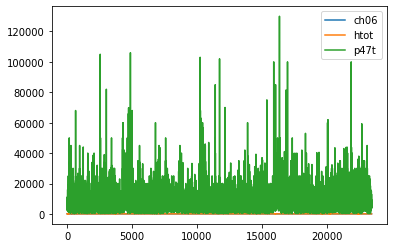

In [17]:
df.plot()

<AxesSubplot:>

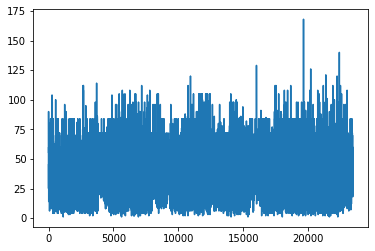

In [18]:
df.htot.plot()